In [42]:
from PIL import Image, ImageDraw
import face_recognition
from cv2 import cv2
import random
import copy
from PIL import Image, ImageDraw #Подключим необходимые библиотеки.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [2]:
def get_all_lips(file):
    image = face_recognition.load_image_file(file)

    # Find all facial features in all the faces in the image
    face_landmarks_list = face_recognition.face_landmarks(image)

    #print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

    # Create a PIL imagedraw object so we can draw on the picture
    pil_image = Image.fromarray(image)
    d = ImageDraw.Draw(pil_image)

    vect = list()
    top_lip = list()
    bottom_lip = list()

    for face_landmarks in face_landmarks_list:

        # Print the location of each facial feature in this image
        for facial_feature in face_landmarks.keys():
            if facial_feature == 'top_lip':
                top_lip = face_landmarks[facial_feature]
            elif facial_feature== 'bottom_lip':
                bottom_lip = face_landmarks[facial_feature]
            else:
                continue
            #print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

        # Let's trace out each facial feature in the image with a line!
        for facial_feature in face_landmarks.keys():
            if facial_feature == 'top_lip':
                d.line(face_landmarks[facial_feature], width=5)
            elif facial_feature== 'bottom_lip':
                d.line(face_landmarks[facial_feature], width=5)
                
                
        all_lips = top_lip + bottom_lip
        return all_lips

In [3]:
#slicing video

def ExtractFrames(filename, millis, num, interval):
    cap = cv2.VideoCapture(filename)
    fps = cap.get(cv2.CAP_PROP_FPS)
    start = round(millis / 1000. * fps)
    success = True
    offset = 0
    ctr = 0
    while success and ctr < num:
        cap.set(cv2.CAP_PROP_POS_FRAMES, start + offset)
        success, image = cap.read()
        offset += interval
        ctr += 1
        OutputName = 'frame' + str(ctr) + '.jpg'
        cv2.imwrite(OutputName, image)

In [4]:
def get_min_point(lips):
    maxi = lips[:, 1].max()
    for i in range(len(lips)):
        if (lips[i][1] == maxi):
            return lips[i]

In [5]:
#finding top of clothes
def find_cloths(point, file):
    image = Image.open(file) #Открываем изображение.
    draw = ImageDraw.Draw(image) #Создаем инструмент для рисования.
    width = image.size[0] #Определяем ширину.
    height = image.size[1] #Определяем высоту.
    print(image.size)
    pix = image.load() #Выгружаем значения пикселей.
    eps = (255/100) * 10
    x = int(point[0])
    y = int(point[1])
    #print("y", type(y))
    #print("x", type(x))
    banches = 10
    ans = 0
    res = np.array([point[0], point[1]])
    for i in range(100, 500):
        pref = int((pix[x, y + i - 1][0] + pix[x, y + i][0]) / 2)
        
        #print("red_pref", red_pref)
        #print("red_suf", red_suf)
        if (pref < 80 and abs(pix[x, y + i - 1][0] + pix[x, y + i - 1][1]  - pix[x, y + i + 1][0] - pix[x, y + i + 1][1] > 50)):
            res[1] = point[1] + i
            pix[x, y + i] = (255, 0, 0)
            print(y + i)
            pix[x, y + i] = (255, 0, 0)
            #image.show()
            return res
    return res



In [54]:
#slicing all videos and finding function of moving
quantity_of_frames = 65
vectors2 = np.array([[],])
for vid in range(1, 10):
    video = "vi" + str(vid) + '.MOV'
    if (vid == 6):
        continue
    ExtractFrames(video, 20000, quantity_of_frames, 5)
    print(vid)
    vect = np.array([])
    for numb in range(1, quantity_of_frames):
        file = 'frame' + str(numb) + ".jpg"
        
        lips = get_all_lips(file)
        lips = np.array(lips)
        p = get_min_point(lips)
        #print(type(p), "    ")
        point = find_cloths(p, file)
        v = point - p
        print("v: ", v)
        vect = np.append(vect, v[1])
        #print(point)

    print("vect:     ", vect)
    vectors2 = np.append(vectors, vect)
    #plt.plot(vect)
vectors2

1
(1920, 1080)
376
v:  [  0 164]
(1920, 1080)
377
v:  [  0 164]
(1920, 1080)
378
v:  [  0 164]
(1920, 1080)
378
v:  [  0 164]
(1920, 1080)
379
v:  [  0 164]
(1920, 1080)
380
v:  [  0 163]
(1920, 1080)
381
v:  [  0 163]
(1920, 1080)
383
v:  [  0 164]
(1920, 1080)
383
v:  [  0 164]
(1920, 1080)
385
v:  [  0 165]
(1920, 1080)
385
v:  [  0 164]
(1920, 1080)
385
v:  [  0 164]
(1920, 1080)
386
v:  [  0 164]
(1920, 1080)
386
v:  [  0 164]
(1920, 1080)
384
v:  [  0 162]
(1920, 1080)
385
v:  [  0 162]
(1920, 1080)
382
v:  [  0 161]
(1920, 1080)
381
v:  [  0 160]
(1920, 1080)
382
v:  [  0 159]
(1920, 1080)
381
v:  [  0 159]
(1920, 1080)
382
v:  [  0 159]
(1920, 1080)
380
v:  [  0 158]
(1920, 1080)
383
v:  [  0 161]
(1920, 1080)
384
v:  [  0 162]
(1920, 1080)
383
v:  [  0 163]
(1920, 1080)
382
v:  [  0 163]
(1920, 1080)
383
v:  [  0 164]
(1920, 1080)
383
v:  [  0 165]
(1920, 1080)
382
v:  [  0 164]
(1920, 1080)
381
v:  [  0 165]
(1920, 1080)
379
v:  [  0 165]
(1920, 1080)
379
v:  [  0 166]
(1920,

(1920, 1080)
328
v:  [  0 100]
(1920, 1080)
354
v:  [  0 123]
(1920, 1080)
355
v:  [  0 124]
(1920, 1080)
356
v:  [  0 124]
(1920, 1080)
332
v:  [  0 100]
(1920, 1080)
355
v:  [  0 122]
(1920, 1080)
355
v:  [  0 121]
(1920, 1080)
355
v:  [  0 120]
(1920, 1080)
354
v:  [  0 118]
(1920, 1080)
355
v:  [  0 118]
(1920, 1080)
358
v:  [  0 118]
(1920, 1080)
343
v:  [  0 102]
(1920, 1080)
360
v:  [  0 117]
(1920, 1080)
357
v:  [  0 112]
(1920, 1080)
373
v:  [  0 126]
(1920, 1080)
399
v:  [  0 150]
(1920, 1080)
372
v:  [  0 121]
(1920, 1080)
386
v:  [  0 134]
(1920, 1080)
373
v:  [  0 121]
(1920, 1080)
381
v:  [  0 130]
(1920, 1080)
384
v:  [  0 134]
(1920, 1080)
373
v:  [  0 122]
(1920, 1080)
383
v:  [  0 134]
(1920, 1080)
371
v:  [  0 123]
vect:      [100. 100. 102. 102. 101. 102. 100. 121. 120. 118. 117. 116. 116. 116.
 116. 120. 100. 100. 100. 101. 100. 101. 101. 102. 102. 102. 101. 100.
 100. 120. 119. 127. 116. 116. 126. 120. 122. 100. 100. 100. 100. 123.
 124. 124. 100. 122. 121. 120. 1

(1920, 1080)
v:  [0 0]
(1920, 1080)
720
v:  [  0 496]
(1920, 1080)
v:  [0 0]
(1920, 1080)
v:  [0 0]
(1920, 1080)
v:  [0 0]
(1920, 1080)
660
v:  [  0 438]
(1920, 1080)
650
v:  [  0 429]
(1920, 1080)
353
v:  [  0 131]
(1920, 1080)
619
v:  [  0 397]
(1920, 1080)
653
v:  [  0 432]
(1920, 1080)
685
v:  [  0 464]
(1920, 1080)
634
v:  [  0 412]
(1920, 1080)
347
v:  [  0 125]
(1920, 1080)
353
v:  [  0 130]
(1920, 1080)
354
v:  [  0 131]
(1920, 1080)
353
v:  [  0 130]
(1920, 1080)
681
v:  [  0 459]
(1920, 1080)
680
v:  [  0 459]
(1920, 1080)
653
v:  [  0 432]
(1920, 1080)
652
v:  [  0 431]
(1920, 1080)
652
v:  [  0 432]
(1920, 1080)
651
v:  [  0 431]
(1920, 1080)
652
v:  [  0 432]
(1920, 1080)
652
v:  [  0 435]
(1920, 1080)
684
v:  [  0 468]
(1920, 1080)
685
v:  [  0 469]
(1920, 1080)
632
v:  [  0 417]
(1920, 1080)
687
v:  [  0 470]
(1920, 1080)
634
v:  [  0 418]
(1920, 1080)
683
v:  [  0 466]
(1920, 1080)
344
v:  [  0 128]
(1920, 1080)
656
v:  [  0 437]
(1920, 1080)
668
v:  [  0 449]
(1920, 10

array([163., 162., 161., 161., 161., 162., 162., 163., 163., 164., 164.,
       164., 165., 165., 166., 165., 165., 164., 163., 162., 162., 162.,
       161., 161., 160., 160., 159., 161., 162., 164., 164., 164., 164.,
       164., 163., 164., 164., 164., 165.,   0.,   0., 164., 164., 163.,
       187., 439., 187., 188., 190., 186., 171., 187., 171., 171., 172.,
       173., 174., 174., 173., 174., 174., 174., 173., 174., 175., 189.,
       189., 193., 193., 193., 192., 192., 194., 195., 195., 196., 191.,
       176., 190., 190., 174., 175., 175., 174., 176., 176., 176., 175.,
       105., 104., 105., 106., 103., 100., 104., 107., 109., 109., 111.,
       111., 111., 108., 106., 104., 105., 107., 105., 110., 110., 114.,
       112., 108., 108., 106., 116., 102., 104., 108., 110., 109., 132.,
       109., 108., 105., 105., 103., 101., 104., 108., 109., 110., 109.,
       110., 127., 117., 128., 128., 119., 130., 100., 105., 100., 100.,
       100., 120., 120., 118., 117., 116., 115., 11

In [151]:
vect3 = vectors2.reshape(8, 52)

In [152]:
vect3.shape

(8, 52)

In [150]:
video = 'test.MOV'
ExtractFrames(video, 20000, quantity_of_frames, 5)
print(vid)
vect = np.array([])
for numb in range(1, quantity_of_frames):
    file = 'frame' + str(numb) + ".jpg"

    lips = get_all_lips(file)
    lips = np.array(lips)
    p = get_min_point(lips)
    point = find_cloths(p, file)
    v = point - p
    print("v: ", v)
    vect = np.append(vect, v[1])
    #print(point)

9
(1920, 1080)
415
v:  [  0 125]
(1920, 1080)
410
v:  [  0 122]
(1920, 1080)
410
v:  [  0 123]
(1920, 1080)
412
v:  [  0 126]
(1920, 1080)
411
v:  [  0 126]
(1920, 1080)
412
v:  [  0 127]
(1920, 1080)
413
v:  [  0 128]
(1920, 1080)
412
v:  [  0 127]
(1920, 1080)
408
v:  [  0 124]
(1920, 1080)
405
v:  [  0 121]
(1920, 1080)
409
v:  [  0 125]
(1920, 1080)
409
v:  [  0 126]
(1920, 1080)
401
v:  [  0 119]
(1920, 1080)
408
v:  [  0 126]
(1920, 1080)
407
v:  [  0 126]
(1920, 1080)
409
v:  [  0 127]
(1920, 1080)
409
v:  [  0 129]
(1920, 1080)
408
v:  [  0 129]
(1920, 1080)
409
v:  [  0 129]
(1920, 1080)
407
v:  [  0 128]
(1920, 1080)
411
v:  [  0 129]
(1920, 1080)
414
v:  [  0 130]
(1920, 1080)
407
v:  [  0 123]
(1920, 1080)
406
v:  [  0 122]
(1920, 1080)
412
v:  [  0 126]
(1920, 1080)
410
v:  [  0 123]
(1920, 1080)
412
v:  [  0 126]
(1920, 1080)
414
v:  [  0 130]
(1920, 1080)
415
v:  [  0 131]
(1920, 1080)
415
v:  [  0 131]
(1920, 1080)
416
v:  [  0 132]
(1920, 1080)
410
v:  [  0 126]
(1920,

In [153]:
vect = vect[12:]
vect = torch.tensor(vect).float()

In [155]:
vect.shape

torch.Size([52])

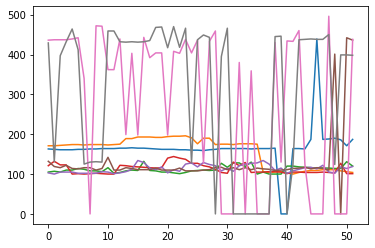

In [405]:
for line in vect3:
    plt.plot(line)
plt.show()

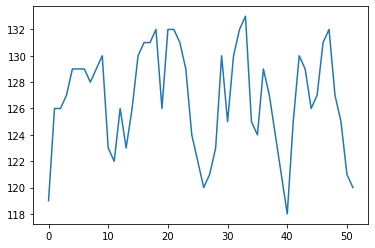

In [406]:
plt.plot(vect)

In [394]:
#neural network
class Approximation(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(Approximation, self).__init__()
        self.fc1 = torch.nn.Linear(52, n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 5)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(5, 3)
        self.act3 = torch.nn.Tanh()
        self.fc4 = torch.nn.Linear(3, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x) 
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        return x

appr = Approximation(20)

In [395]:
#loss function
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

In [396]:
#optimizer
optimizer = torch.optim.Adam(appr.parameters(), lr=0.001)

In [397]:
#answeres
y_train = (torch.tensor([14., 15., 31., 16., 18., 40., 24., 24.]) / 60).unsqueeze_(1).float()

In [398]:
#training data
x_train = torch.tensor(vect3).float()

In [399]:
#studing of neural network
for epoch_index in range(9000):
    optimizer.zero_grad()
    #print(x_train)
    y_pred = appr.forward(x_train)
    #print(y_pred)
    #break;
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

check = appr.forward(x_train)
ans = appr.forward(vect)

In [416]:
ans = ans * 60
print("answere for breathing rate", (ans))

answere for breathing rate tensor([18.7998], grad_fn=<MulBackward0>)


In [403]:
y_train

tensor([[0.2333],
        [0.2500],
        [0.5167],
        [0.2667],
        [0.3000],
        [0.6667],
        [0.4000],
        [0.4000]])

In [404]:
check

tensor([[0.3133],
        [0.3133],
        [0.3133],
        [0.3133],
        [0.3133],
        [0.6667],
        [0.4000],
        [0.4000]], grad_fn=<AddmmBackward>)

In [418]:
print("answere for pulse", -0.0213*(ans * ans) + 2.7215 * ans + 12.538)

answere for pulse tensor([56.1735], grad_fn=<AddBackward0>)
